<a href="https://colab.research.google.com/github/project-ida/two-state-quantum-systems/blob/master/05-many-two-state-systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <a href="https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/05-many-two-state-systems.ipynb" target="_parent"><img src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" alt="Open In nbviewer" width="100"/></a>

# 5 - Many two state systems

> TODO: Intro

In [2]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import Image
import gif
import numpy as np
import pandas as pd
from qutip import *
from qutip.piqs import *
from qutip.cy.piqs import j_min, j_vals, m_vals
import warnings
warnings.filterwarnings('ignore')
from itertools import product
import os
from fractions import Fraction

# Functions created in 04 tutorial

from libs.helper_05_tutorial import *

In [3]:
spins = spin_algebra(2)

In [4]:
spins[2][0]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.5  0.   0.   0. ]
 [ 0.   0.5  0.   0. ]
 [ 0.   0.  -0.5  0. ]
 [ 0.   0.   0.  -0.5]]

In [5]:
spins[2]

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[ 0.5  0.   0.   0. ]
  [ 0.   0.5  0.   0. ]
  [ 0.   0.  -0.5  0. ]
  [ 0.   0.   0.  -0.5]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
 Qobj data =
 [[ 0.5  0.   0.   0. ]
  [ 0.  -0.5  0.   0. ]
  [ 0.   0.   0.5  0. ]
  [ 0.   0.   0.  -0.5]]]

In [6]:
spins[2][0]*tensor(basis(2,1), basis(2,1))

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [-0.5]]

In [7]:
A=0.1

In [8]:
H = spins[2][0] + spins[2][1] + A*spins[0][0] + A*spins[0][1]

In [9]:
H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.    0.05  0.05  0.  ]
 [ 0.05  0.    0.    0.05]
 [ 0.05  0.    0.    0.05]
 [ 0.    0.05  0.05 -1.  ]]

In [10]:
df = make_df_for_energy_scan("$\delta$/A", -40,40, 100, spins[2][0].shape[0])

In [11]:
spins[2][1]+spins[2][0]


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0. -1.]]

In [12]:
A=0.1
for i, row in df.iterrows():
    H =  row[ "$\delta$/A"]*A*spins[2][0] + row[ "$\delta$/A"]*A*spins[2][1] + A*spins[0][0] + A*spins[0][1]
    evals, ekets = H.eigenstates()
    df.iloc[i,1:] = evals

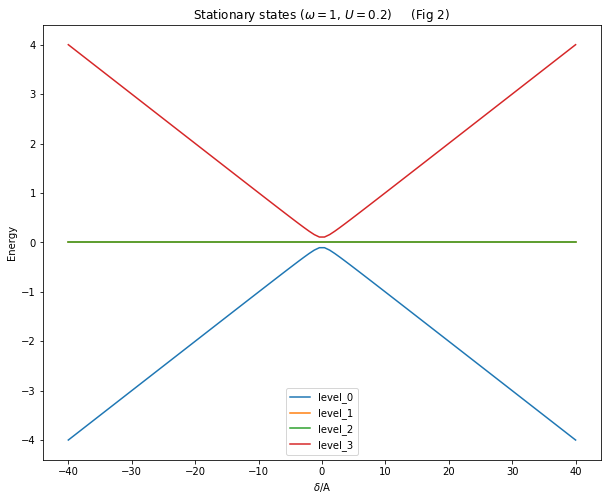

In [13]:
df.plot(x="$\delta$/A",figsize=(10,8),legend=True, 
        title="Stationary states ($\omega=1$, $U=0.2$)     (Fig 2)");
plt.ylabel("Energy");

In [14]:
delE = 1

In [15]:
A = 0.01

In [16]:
H = delE*spins[2][0] + delE*spins[2][1] + A*spins[0][0] + A*spins[0][1]

In [17]:
H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.     0.005  0.005  0.   ]
 [ 0.005  0.     0.     0.005]
 [ 0.005  0.     0.     0.005]
 [ 0.     0.005  0.005 -1.   ]]

In [18]:
evals, ekets = H.eigenstates()

In [19]:
evals

array([-1.0000500e+00, -8.8817842e-16,  0.0000000e+00,  1.0000500e+00])

In [20]:
ekets

array([Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 2.49981252e-05]
 [-4.99975002e-03]
 [-4.99975002e-03]
 [ 9.99975002e-01]],
       Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.00707071]
 [-0.70707143]
 [-0.70707143]
 [-0.00707071]],
       Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [-0.70710678]
 [ 0.70710678]
 [ 0.        ]],
       Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[9.99975002e-01]
 [4.99975002e-03]
 [4.99975002e-03]
 [2.49981252e-05]]], dtype=object)

In [21]:
Jx = spins[0][0] + spins[0][1]
Jy = spins[1][0] + spins[1][1]
Jz = spins[2][0] + spins[2][1]

In [22]:
H = delE*Jz + A*Jx

In [23]:
H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.     0.005  0.005  0.   ]
 [ 0.005  0.     0.     0.005]
 [ 0.005  0.     0.     0.005]
 [ 0.     0.005  0.005 -1.   ]]

In [24]:
J2 = Jx**2 + Jy**2 + Jz**2

In [25]:
J2

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[2. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 2.]]

In [26]:
commutator(H,J2)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [27]:
J2.transform(ekets)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]]

In [28]:
J = jspin(2)

In [29]:
Jx = J[0]
Jy = J[1]
Jz = J[2]

In [30]:
A = 0.01

In [31]:
H = delE*Jz + A*Jx

In [32]:
H

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.          0.00707107  0.          0.        ]
 [ 0.00707107  0.          0.00707107  0.        ]
 [ 0.          0.00707107 -1.          0.        ]
 [ 0.          0.          0.          0.        ]]

In [33]:
J2 = Jx**2 + Jy**2 + Jz**2

In [34]:
J2

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 0.]]

[Wolfram alpha eigenvalues](https://www.wolframalpha.com/input/?i=%7B%7B1%2Ca%2C0%7D%2C%7Ba%2C0%2Ca%7D%2C%7B0%2Ca%2C-1%7D%7D+eigenvalues)

In [35]:
def j_states_list(num_tss):
    i=0
    
    jm_list = []
    j_index = {}

    js = j_vals(num_tss)[::-1]
    
    for j in js:
        j_index[j] = []
        ms = m_vals(j)[::-1]
        for m in ms:
            j_index[j].append(i)
            jm_list.append((j,m))
            i+=1
    return j_index, jm_list

In [168]:
def make_braket_labels(jm_list):
    bra_labels = ["$\langle$"+str(Fraction(j))+", "+str(Fraction(m))+" |" for (j,m) in jm_list]
    ket_labels = ["| "+str(Fraction(j))+", "+str(Fraction(m))+"$\\rangle$" for (j,m) in jm_list]
    return bra_labels, ket_labels

In [178]:
def make_operators(num_tss, j):
    
    j_index, jm_list = j_states_list(num_tss)
    
    try:
        j_index[j]
    except:
        raise Exception(f"j needs to be one of {j_vals(num_tss)}")
    
    Js = jspin(num_tss)
    Jx = Js[0]
    Jz = Js[2]
    

    
    num_ms = len(m_vals(j))
    Jz = Jz.extract_states(j_index[j])
    Jx = Jx.extract_states(j_index[j])
    jm_list = [jm_list[i] for i in j_index[j]]
    
    
    
    return Jz, Jx, jm_list

In [179]:
Jz, Jx, jm_list = make_operators(6, 3)

In [263]:
df = make_df_for_energy_scan("$\Delta E$/A", -4,4, 100, Jz.shape[0])

In [264]:
A=0.1
for i, row in df.iterrows():
    H =  row[ "$\Delta E$/A"]*A*Jz +  A*Jx
    evals, ekets = H.eigenstates()
    df.iloc[i,1:] = evals

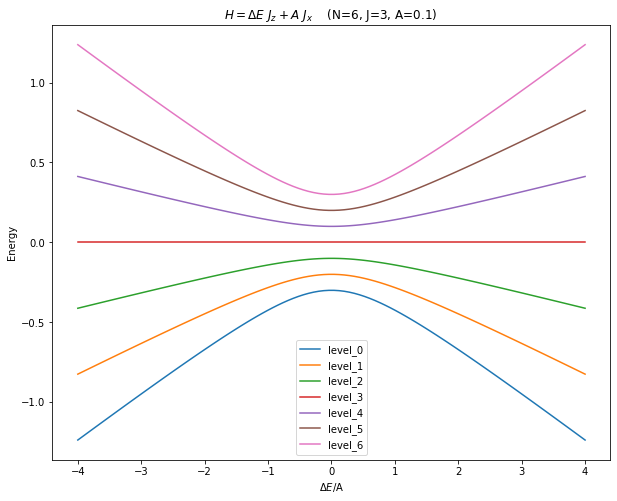

In [265]:
df.plot(x="$\Delta E$/A",figsize=(10,8),legend=True, 
        title="$H=\Delta E \ J_z + A \ J_x$    (N=6, J=3, A=0.1) ");
plt.ylabel("Energy");

In [169]:
bra_labels, ket_labels = make_braket_labels(jm_list)

In [ ]:
# Function created in 01 tutorial to make plotting of states calculated from `sesolve` easier
def states_to_df(states,times):
    psi_plus = np.zeros(len(times),dtype="complex128")  # To store the amplitude of the |+> state
    psi_minus = np.zeros(len(times),dtype="complex128") # To store the amplitude of the |-> state

    for i, state in enumerate(states):
        psi_plus[i] = state[0][0][0]
        psi_minus[i] = state[1][0][0]

    return pd.DataFrame(data={"+":psi_plus, "-":psi_minus}, index=times)

In [307]:
delta = 0.001
A = 0.1

H0 = A*Jx

evals, estates = H0.eigenstates()

H1 =  delta*Jz

H = [H0,[H1,'cos(w*t)']]

times = np.linspace(0.0, 10000.0, 1000) 

# psi0=basis(7,0)
psi0 = estates[6]

result = sesolve(H, psi0, times, args={'w':A})

# result = sesolve(H0, basis(7,0), times)



In [308]:
num_states = result.states[0].shape[0]
psi = np.zeros([num_states,times.size], dtype="complex128")
P = np.zeros([num_states,times.size], dtype="complex128")

for i, state in enumerate(result.states):
    transformed_state = state.transform(estates)
    psi[:,i] = np.transpose(transformed_state)
    P[:,i] = np.abs(psi[:,i]*np.conj(psi[:,i]))

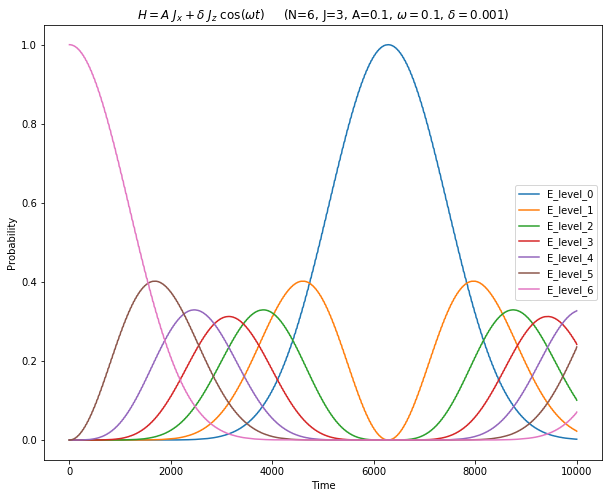

In [316]:
plt.figure(figsize=(10,8))
for i in range(0,P.shape[0]):
    plt.plot(times, P[i,:], label=f"E_level_{i}")
plt.ylabel("Probability")
plt.xlabel("Time")
plt.legend(loc="right")
plt.title("$H =A \ J_x + \delta \ J_z \  \cos (\omega t)$     (N=6, J=3, A=0.1, $\omega = 0.1$, $\delta=0.001$)")
plt.show();

In [266]:
H0 = A*Jx

In [267]:
evals, estates = H0.eigenstates()

In [269]:
evals

array([-3.00000000e-01, -2.00000000e-01, -1.00000000e-01,  2.22044605e-16,
        1.00000000e-01,  2.00000000e-01,  3.00000000e-01])

In [268]:
estates

array([Quantum object: dims = [[7], [1]], shape = (7, 1), type = ket
Qobj data =
[[ 0.125     ]
 [-0.30618622]
 [ 0.48412292]
 [-0.55901699]
 [ 0.48412292]
 [-0.30618622]
 [ 0.125     ]],
       Quantum object: dims = [[7], [1]], shape = (7, 1), type = ket
Qobj data =
[[-0.30618622]
 [ 0.5       ]
 [-0.39528471]
 [ 0.        ]
 [ 0.39528471]
 [-0.5       ]
 [ 0.30618622]],
       Quantum object: dims = [[7], [1]], shape = (7, 1), type = ket
Qobj data =
[[ 0.48412292]
 [-0.39528471]
 [-0.125     ]
 [ 0.4330127 ]
 [-0.125     ]
 [-0.39528471]
 [ 0.48412292]],
       Quantum object: dims = [[7], [1]], shape = (7, 1), type = ket
Qobj data =
[[-0.55901699]
 [ 0.        ]
 [ 0.4330127 ]
 [ 0.        ]
 [-0.4330127 ]
 [ 0.        ]
 [ 0.55901699]],
       Quantum object: dims = [[7], [1]], shape = (7, 1), type = ket
Qobj data =
[[ 0.48412292]
 [ 0.39528471]
 [-0.125     ]
 [-0.4330127 ]
 [-0.125     ]
 [ 0.39528471]
 [ 0.48412292]],
       Quantum object: dims = [[7], [1]], shape = (7, 1), ty

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1826110f98>)

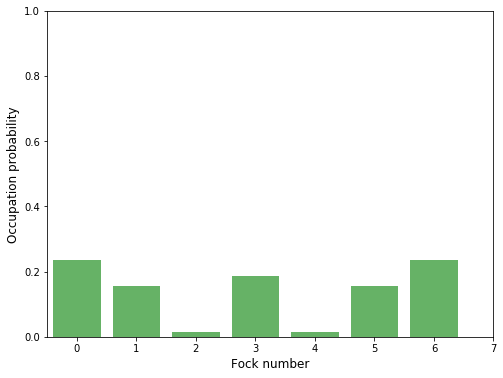

In [278]:
plot_fock_distribution(estates[2])

Quantum object: dims = [[7], [1]], shape = (7, 1), type = ket
Qobj data =
[[0.125     ]
 [0.30618622]
 [0.48412292]
 [0.55901699]
 [0.48412292]
 [0.30618622]
 [0.125     ]]

In [273]:
jm_list

[(3.0, 3.0),
 (3.0, 2.0),
 (3.0, 1.0),
 (3.0, 0.0),
 (3.0, -1.0),
 (3.0, -2.0),
 (3.0, -3.0)]